In [38]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16

In [39]:
df_train = pd.read_json('../raw_data/splits/train.json')
df_val = pd.read_json('../raw_data/splits/val.json')
df_test = pd.read_json('../raw_data/splits/test.json')

In [40]:
# create a feature path_to_image
path = '../raw_data/IMG/'
data['path_to_image'] = path + data['image_name']

In [57]:
data_split(df_train, df_val, df_test, 1000)

In [58]:
data_train.head()

NameError: name 'data_train' is not defined

In [5]:
#df_butterfly = data_transformation(df)

In [8]:
#data_sample = df_butterfly.sample(1000,random_state = 818)

In [9]:
image = []
for i in data_sample['path_to_image'] :
    image.append(np.array(plt.imread(i)))
image = np.array(image)

In [45]:
X_train = []
for i in data_train['path_to_image'] :
    image.append(np.array(plt.imread(i)))
X_train = np.array(image)

NameError: name 'data_train' is not defined

In [10]:
X = image
y = data_sample['species']

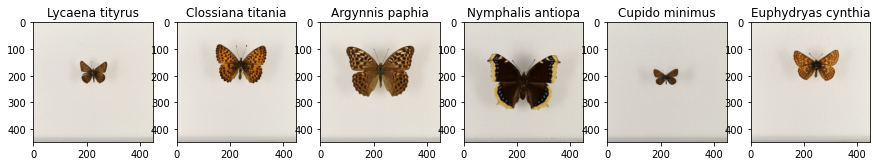

In [11]:
plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = image[i]
    plt.imshow(img)
    plt.title(data_sample['species'][i])

In [13]:
#load the model VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=image[0].shape)
    
    return model

In [14]:
model = load_model()
model.summary()

58900480/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
______________________________________________________________

In [24]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

model
model = set_nontrainable_layers(model)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 448, 448, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 448, 448, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 224, 224, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 224, 224, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 224, 224, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 112, 112, 128)     0     

In [25]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainables, and add additional trainable layers on top'''
    # $CHALLENGIFY_BEGIN
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(3, activation='softmax')
    
    
    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    # $CHALLENGIFY_END
    return model

In [26]:
model = add_last_layers(model)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 14, 14, 512)       14714688  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 500)               50176500  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1503      
Total params: 64,892,691
Trainable params: 50,178,003
Non-trainable params: 14,714,688
_________________________________________________________________


In [27]:
from tensorflow.keras import optimizers

def build_model():
    # $CHALLENGIFY_BEGIN    
    model = load_model()
    model = add_last_layers(model)
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
    # $CHALLENGIFY_END

In [28]:
model = build_model()

# Back to the data

In [31]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [32]:
X_train = preprocess_input(X_train) 
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

NameError: name 'X_train' is not defined